## Nim : 231351011
## Nama : Ahmad Rizki Sabani
## Kelas : Pagi A

### 1.Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Import Dataset

In [2]:
df = pd.read_csv('Pinjaman.csv')
df.head(10)

,Usia,Pendapatan,Status_Perkawinan,Jumlah_Pinjaman,Durasi_Pinjaman,Status_Pekerjaan,Lulus_Kredit
0,25,40,Belum Menikah,50,5,Karyawan Tetap,Tidak Layak
1,45,100,Menikah,80,10,Wirausaha,Layak
2,35,60,Menikah,100,15,Karyawan Kontrak,Tidak Layak
3,28,75,Belum Menikah,60,7,Karyawan Tetap,Layak
4,50,120,Menikah,150,20,Wirausaha,Layak
5,30,50,Belum Menikah,40,4,Karyawan Kontrak,Tidak Layak
6,38,90,Menikah,70,9,Wirausaha,Layak
7,29,65,Menikah,55,6,Karyawan Tetap,Layak
8,55,140,Menikah,200,25,Pensiunan,Layak
9,40,85,Menikah,120,15,Wirausaha,Layak


### 3.Exploratory Data Analyst

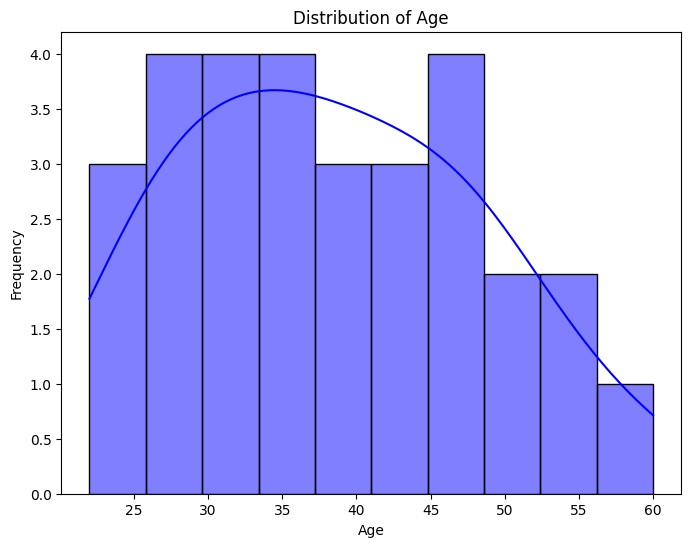

In [3]:
plt.figure(figsize=(8,6))
sns.histplot(df['Usia'], bins=10, kde=True,color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\saban\AppData\Local\Temp\ipykernel_2264\3410738285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lulus_Kredit', y='Pendapatan', data=df,palette='Set1')


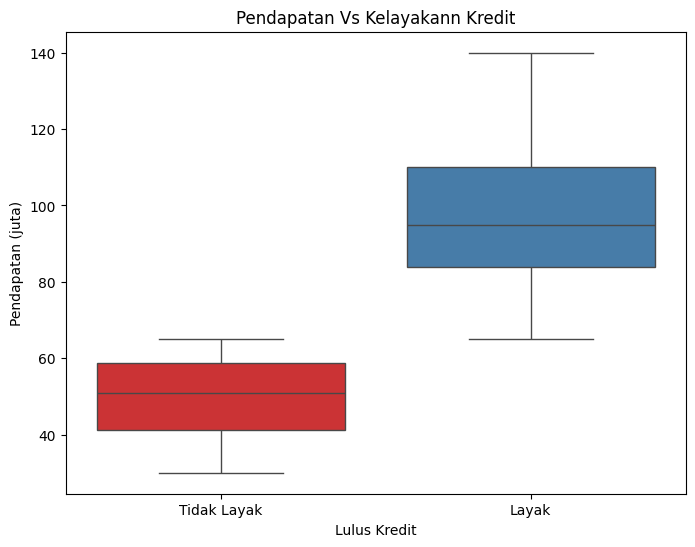

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Lulus_Kredit', y='Pendapatan', data=df,palette='Set1')
plt.title('Pendapatan Vs Kelayakann Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Pendapatan (juta)')
plt.xticks(ticks=[0, 1], labels=['Tidak Layak', 'Layak'])
plt.show()

C:\Users\saban\AppData\Local\Temp\ipykernel_2264\4111407626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status_Perkawinan', data=df, palette='Set2')


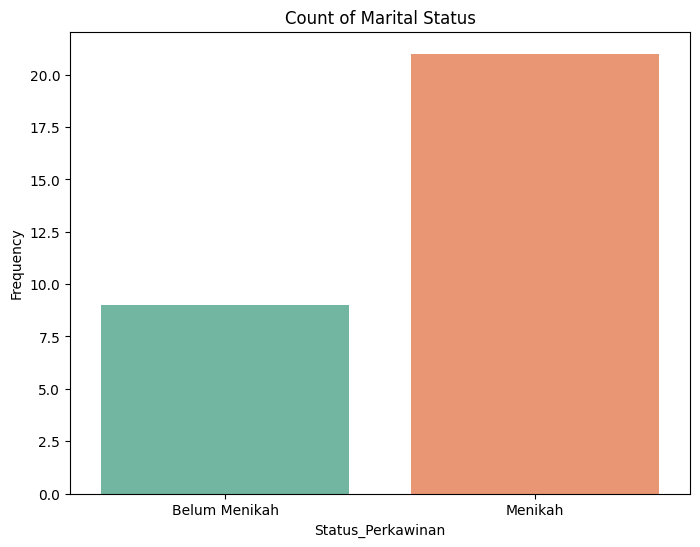

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x='Status_Perkawinan', data=df, palette='Set2')
plt.title('Count of Marital Status')
plt.xticks(ticks=[0, 1], labels=['Belum Menikah', 'Menikah'])
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

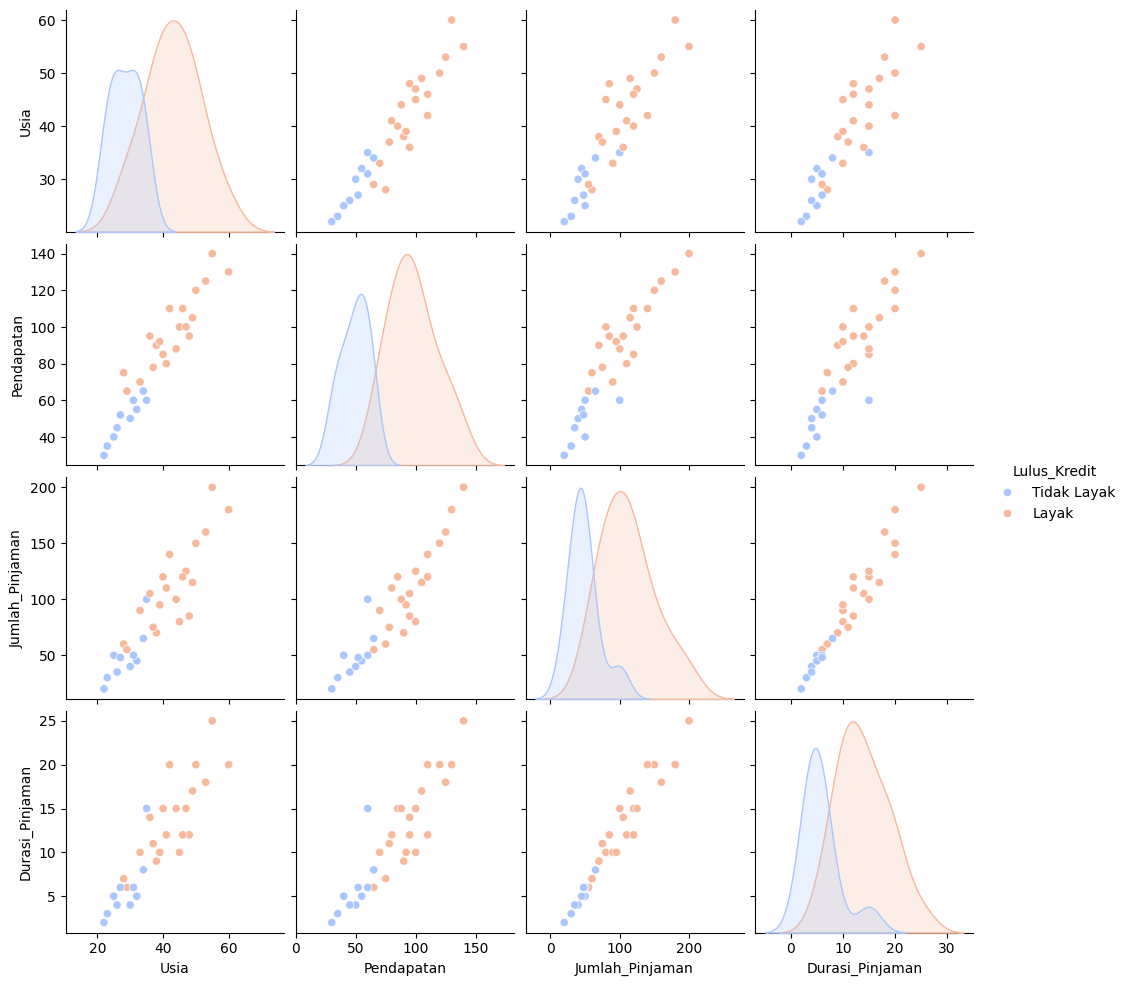

In [6]:
plt.figure(figsize=(8,6))
sns.pairplot(df[['Usia', 'Pendapatan', 'Jumlah_Pinjaman','Durasi_Pinjaman', 'Lulus_Kredit']], hue='Lulus_Kredit', palette='coolwarm')
plt.show()

C:\Users\saban\AppData\Local\Temp\ipykernel_2264\2909022423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Lulus_Kredit', y='Jumlah_Pinjaman', data=df, palette='Set2')


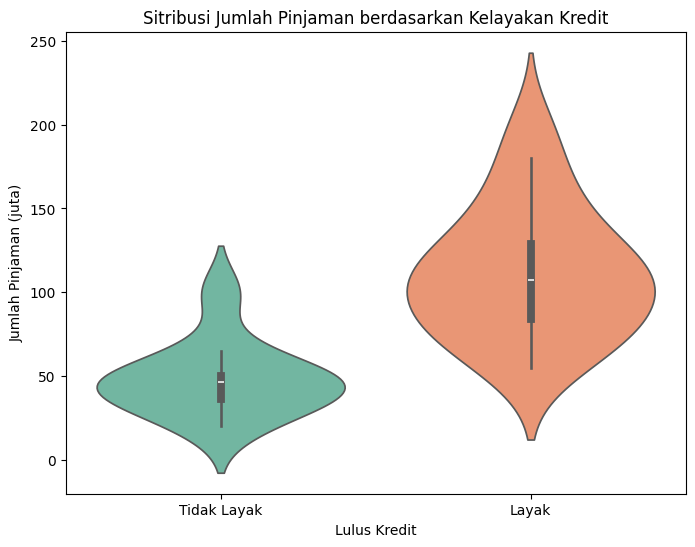

In [7]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Lulus_Kredit', y='Jumlah_Pinjaman', data=df, palette='Set2')
plt.title('Sitribusi Jumlah Pinjaman berdasarkan Kelayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Jumlah Pinjaman (juta)')
plt.xticks(ticks=[0, 1], labels=['Tidak Layak', 'Layak'])
plt.show()

### 4.data preprocessing

In [8]:
label_encoder_status_perkawinan = LabelEncoder()
label_encoder_status_pekerjaan = LabelEncoder()
label_encoder_lulus_kredit = LabelEncoder()

In [9]:
df['Status_Perkawinan'] = label_encoder_status_perkawinan.fit_transform(df['Status_Perkawinan'])
df['Status_Pekerjaan'] = label_encoder_status_pekerjaan.fit_transform(df['Status_Pekerjaan'])
df['Lulus_Kredit'] = label_encoder_lulus_kredit.fit_transform(df['Lulus_Kredit'])

In [10]:
df.to_csv("Pinjaman_modif.csv",index=False)

### 5.Tentukan Input(X) dan Output (Y)

In [11]:
x = df.drop(columns=['Lulus_Kredit'])
y = df['Lulus_Kredit']

### 6.Split data train & Testing

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

### 7.Masukan Algoritma

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 8.Testing Akurasi

In [14]:
y_pred = knn_model.predict(x_test)

### 9.Simulasi dengan inputan data baru

In [15]:
new_data = np.array([[30,80,0,70,10,1]])
new_pred = knn_model.predict(new_data)

c:\Users\saban\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [16]:
print('Hasil Prediksi: ', new_pred)

Hasil Prediksi:  [0]


In [17]:
label_encoder_lulus_kredit.inverse_transform(new_pred)

array(['Layak'], dtype=object)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [19]:
import pickle

filename = 'knn_pinjam_mod.pkl'
pickle.dump(knn_model, open(filename, 'wb'))